# Effects of loan Characteristics on Their Prosper Rating

## by EMMANUEL NCUBE



<a id='overview'></a>
## Investigation Overview
In this investigation, I wanted to look at the characteristics of loans that could be used to determine Prosper rating (alpha) which was adopted after July 2009. I focus on just the influence of the prosper and credit scores, estimated loss on prosper rating (alpha).

## Dataset Overview
The data consists of information regarding a dataset containing prosper loans and attributes for approximately 113,937 loans made to its clients, including Prosper Rating (Alpha), Prosper and Credit Scores, Estimated Loss, and other features. Only loans made after July 2009 were included, when the  Prosper Rating (Alpha) system was adopted.

In [75]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [76]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

# interested columns
interested_cols = ['LoanOriginationDate', 'LoanStatus', 'DebtToIncomeRatio', 'EstimatedLoss',
                   'ProsperScore', 'ProsperRating (Alpha)','CreditScoreRangeLower', 'EmploymentStatus',
                   'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'LoanOriginalAmount']

loans = loans[interested_cols]
loans.head(5)

,LoanOriginationDate,LoanStatus,DebtToIncomeRatio,EstimatedLoss,ProsperScore,ProsperRating (Alpha),CreditScoreRangeLower,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount
0,2007-09-12 00:00:00,Completed,0.17,NaN,NaN,NaN,640.0,Self-employed,True,3083.333333,9425
1,2014-03-03 00:00:00,Current,0.18,0.0249,7.0,A,680.0,Employed,False,6125.000000,10000
2,2007-01-17 00:00:00,Completed,0.06,NaN,NaN,NaN,480.0,Not available,False,2083.333333,3001
3,2012-11-01 00:00:00,Current,0.15,0.0249,9.0,A,800.0,Employed,True,2875.000000,10000
4,2013-09-20 00:00:00,Current,0.26,0.0925,4.0,D,680.0,Employed,True,9583.333333,15000


In [77]:
# Data Wrangling
loans = loans.drop_duplicates()
# anymore duplicates
loans.duplicated().sum()

# take only ProsperRating (Alpha) assigned after July 2009
loans = loans[loans['ProsperRating (Alpha)'].notnull()]
# l will rename some columns
loans.rename(columns={'ProsperRating (Alpha)':'ProsperRatingAlpha',
                      'CreditScoreRangeLower':'CreditScore'}, inplace=True)
# convert LoanOriginationDate to date
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])
# round StatedMonthlyIncome to 2dp
loans['StatedMonthlyIncome'] = round(loans['StatedMonthlyIncome'], 2)
# drop null rows
loans['DebtToIncomeRatio'].fillna(0, inplace=True)

In [78]:
# convert Prosper Rating and Employment Status into ordered categorical types
rating = loans['ProsperRatingAlpha'].value_counts().index
rating_cat = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
loans['ProsperRatingAlpha'] = loans['ProsperRatingAlpha'].astype(rating_cat)

employ_status = loans['EmploymentStatus'].value_counts().index
employment_cat = pd.api.types.CategoricalDtype(ordered = True, categories = employ_status)
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype(employment_cat)

#### Distribution of Prosper Rating

Prosper Ratings, from lowest-risk to highest-risk, are labeled AA, A, B, C, D, E, and HR ("High Risk"). Most prosper clients' prosper ratings are C followed by B, A, D, E and HR. Most borrowers are home owners and the majority of them are employed and full time.

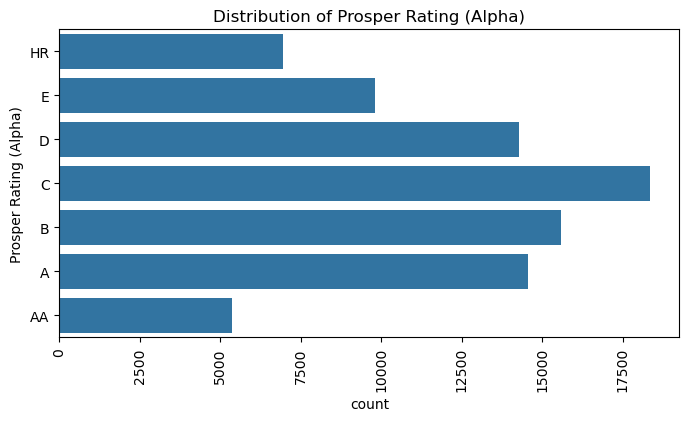

In [79]:
plt.figure(figsize = [8, 4])
order = ['HR', 'E', 'D', 'C', 'B','A', 'AA']
color=base_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'ProsperRatingAlpha', color=base_color, order=order)
plt.xticks(rotation=90)
plt.title('Distribution of Prosper Rating (Alpha)')
plt.ylabel('Prosper Rating (Alpha)')
plt.show();

#### Distribution of Credit Score
The Credit Score looks slightly normally distributed. The most frequent Credit Score range: (660.0 , 670.0).

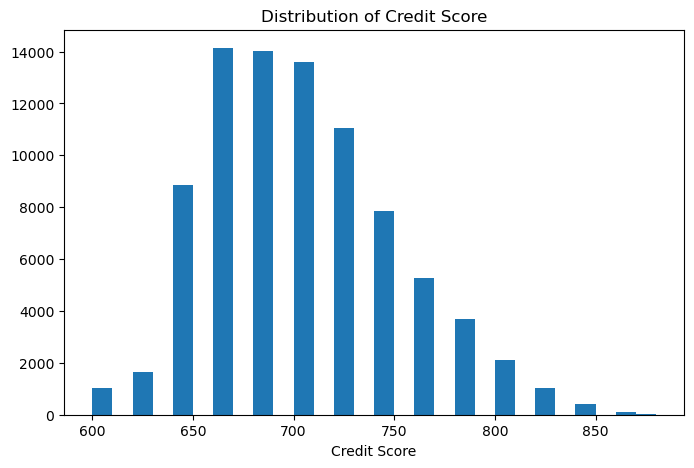

In [80]:
plt.figure(figsize=(8, 5))
binsize = 10
bin_edges = np.arange(loans['CreditScore'].min(), loans['CreditScore'].max() + binsize, binsize)
n1, bins1, patches1 = plt.hist(loans['CreditScore'], bins=bin_edges)
plt.xlabel('Credit Score')
plt.title('Distribution of Credit Score')
plt.show();

#### Distribution of Estimated Loss

Estimated Loss has a lot of outliers. After transformation using axes limits and different binsizes, the Estimated Loss looks bimodal with peaks at firstly soon after 0.075, secondly at slightly after 0.10 and around 0.15. The most frequent estimated loss range: (0.25, 0.11).

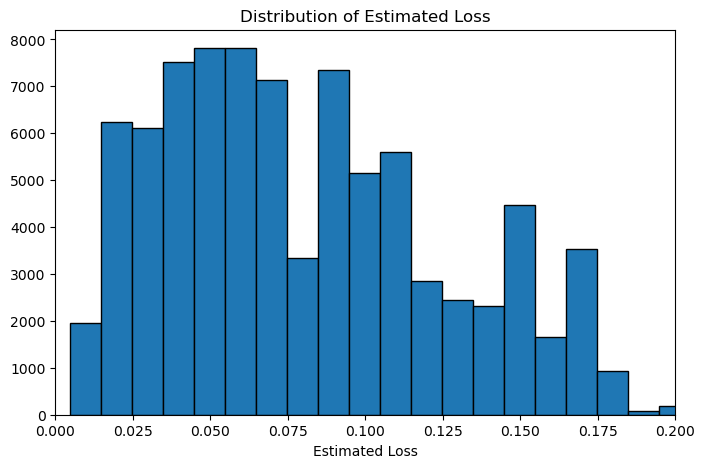

In [81]:
plt.figure(figsize=(8, 5))
binsize = 0.01
bin_edges = np.arange(loans['EstimatedLoss'].min(), loans['EstimatedLoss'].max() + binsize, binsize)
plt.hist(loans['EstimatedLoss'], bins=bin_edges, edgecolor='black')
plt.xlim([0, 0.20])
plt.xlabel('Estimated Loss')
plt.title('Distribution of Estimated Loss')
plt.show();

#### Distribution of Prosper Score
The Prosper Score is bimodal and ranges from 1 - 11. Most Prosper Scores ranges between 5 and 9. The Prosper Score of 8 was the most commonly occuring in the Prosper loans dataset.

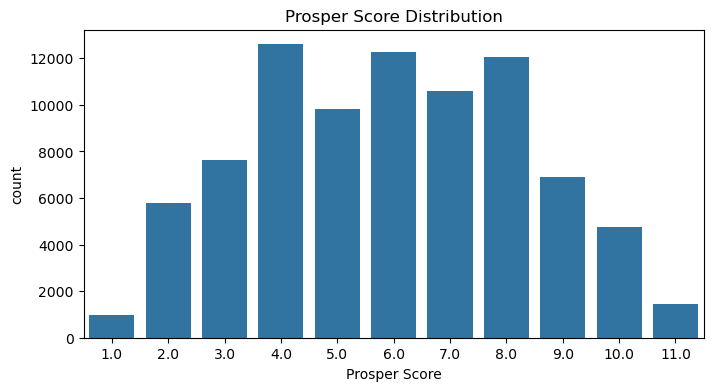

In [82]:
fig = plt.figure(figsize=(8,4))
sb.countplot(data=loans, x='ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')
plt.show()

#### Credit Score and Prosper Score by Prosper Rating

We can see that low prosper rated loans Prosper have low Credit and Prosper Scores.  

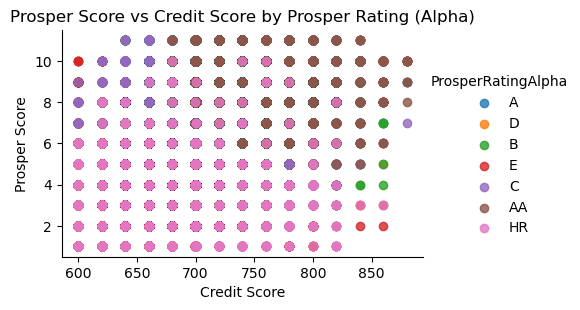

In [83]:
g = sb.FacetGrid(data=loans, hue='ProsperRatingAlpha', hue_order=order_rating, aspect = 1.5)
g.map(sb.regplot, 'CreditScore', 'ProsperScore', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.title('Prosper Score vs Credit Score by Prosper Rating (Alpha)')
plt.xlabel('Credit Score')
plt.ylabel('Prosper Score')
plt.show();

#### Prosper Score vs Credit Score by Estimated Loss 

Higher Credit Score and Prosper scores tend to go with lower estimated losses.

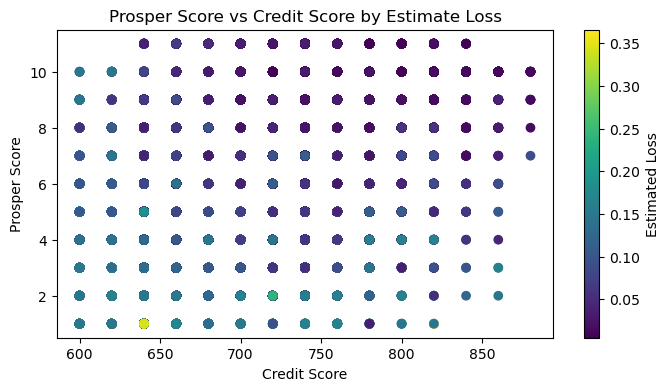

In [84]:
plt.figure(figsize = [8,4])
plt.scatter(data=loans, x = 'CreditScore', y = 'ProsperScore', c='EstimatedLoss')
plt.colorbar(label = 'Estimated Loss')
plt.xlabel('Credit Score')
plt.ylabel('Prosper Score')
plt.title('Prosper Score vs Credit Score by Estimate Loss');

#### Prosper Rating and Estimated Loss
After restricting estimated loss to 0.2, we can clearly see that the higher the estimated loss the low the prosper rating.

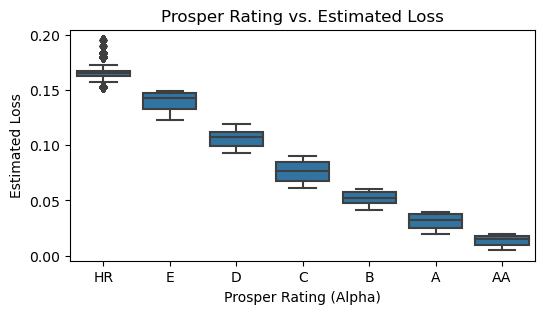

In [85]:
# limit estimated loss to 0.2
estimatedloss_df = loans.query('EstimatedLoss <= 0.2')
plt.figure(figsize=(6, 3))
sb.boxplot(data=estimatedloss_df, y = 'EstimatedLoss',  x ='ProsperRatingAlpha', 
           order=order, color=base_color)
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Estimated Loss')
plt.title('Prosper Rating vs. Estimated Loss');

<a id='Conclusion'></a>
## Conclusion

> Generally, the higher the credit and prosper scores, the lower the estimated loss and the higher the prosper rating. Estimated Loss has a major effect on prosper rating (alpha) and estimated loss is determined by prosper score and credit score.